In [1]:
#Importing the dependecies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pygeocoder import Geocoder
import folium
from matplotlib import colors
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import citipy as cp


In [2]:
# Loading the file
file1 = "impacts.csv"
file2 = "meteorite-landings.csv"

## Asteroids Data

In [3]:
# Reading the asteroids csv data file 
impacts = pd.read_csv(file1)

# Displaying the data table for preview
impacts.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [4]:
asteroids = impacts.rename(columns ={"Object Name": "Name"})
asteroids.head()

,Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [5]:
#Dropping some unecessary columns 
asteroids = asteroids.drop(columns = ["Maximum Torino Scale", "Cumulative Palermo Scale"])
asteroids.head()

,Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.96
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.87
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.95
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-4.30


In [6]:
asteroids.loc[asteroids['Maximum Palermo Scale'].idxmax()]

Name                             29075 (1950 DA)
Period Start                                2880
Period End                                  2880
Possible Impacts                               1
Cumulative Impact Probability            0.00012
Asteroid Velocity                           14.1
Asteroid Magnitude                          17.6
Asteroid Diameter (km)                       1.3
Maximum Palermo Scale                      -1.42
Name: 682, dtype: object

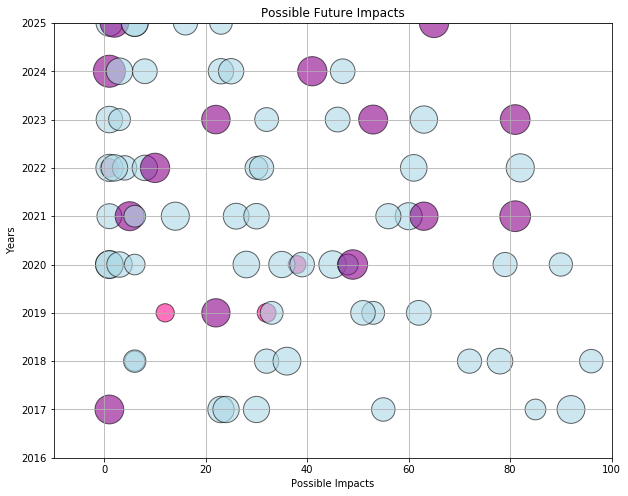

In [20]:
def impact_score(impact):
    if impact < -8:
        return 'darkmagenta'
    elif impact < -4:
        return 'LightBlue'
    else:
        return 'deeppink'
    
def asteroid_scale(scale):
    return (scale) * -100;
  

x = asteroids['Possible Impacts']
y = asteroids['Period Start']
z = asteroids['Maximum Palermo Scale']

asteroids_list = asteroids['Maximum Palermo Scale']
asteroids_list_colors = [impact_score(impact) for impact in asteroids_list]

asteroids_scale_list= [asteroid_scale(scale) for scale in asteroids_list]

fig = plt.figure(figsize=(10,8))
plt.ylim(2016,2025)
plt.xlim(-10,100)
plt.scatter(x, y, s=asteroids_scale_list , c=asteroids_list_colors, alpha=0.6, marker="o", edgecolors="black")

plt.title("Possible Future Impacts")
plt.xlabel("Possible Impacts")
plt.ylabel("Years")
# plt.legend(handles=[x, y, z], loc = "best")
plt.grid()

plt.savefig("../possible_impacts_asteroids.png")
plt.show()

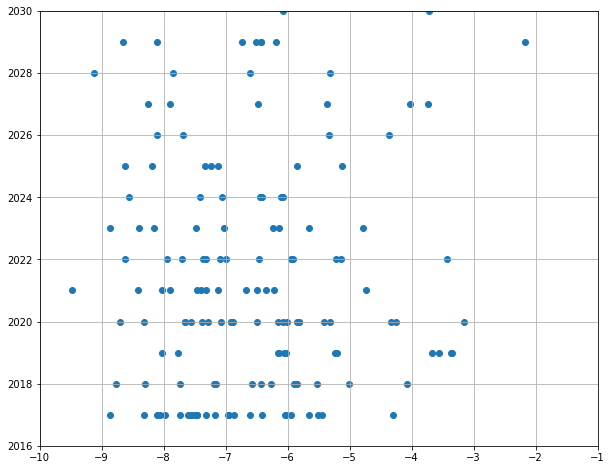

In [8]:
fig = plt.figure(figsize=(10,8))
plt.scatter(asteroids["Maximum Palermo Scale"], asteroids["Period Start"])

plt.xlim([-10,-1])
plt.ylim([2016, 2030])

plt.grid()
plt.show()

Text(0,0.5,'Asteroid Velocity (km/s)')

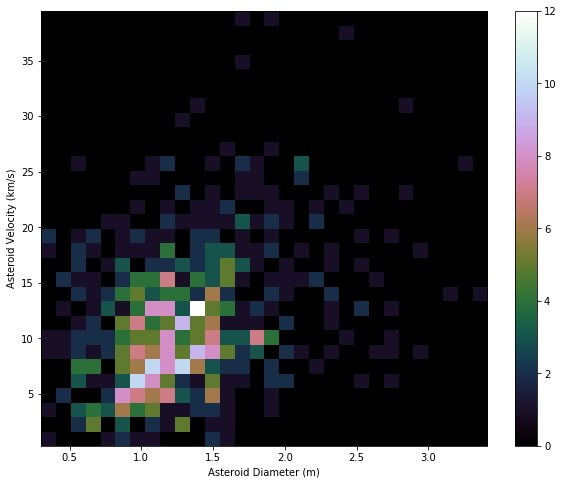

In [9]:
fig = plt.figure(figsize=(10,8))
 # ax = fig.add_subplot(111)# ax = fi 
x = np.log10(asteroids['Asteroid Diameter (km)']*1000)
y = asteroids['Asteroid Velocity']
_ = plt.hist2d(x,y, bins=30, figure=fig, cmap=plt.cm.cubehelix)
plt.colorbar()
plt.xlabel('Asteroid Diameter (m)')
plt.ylabel('Asteroid Velocity (km/s)')

## Meteorites Data

In [10]:
# Reading the meteor csv data file 
meteor = pd.read_csv(file2)
meteor.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [11]:
meteor = meteor.rename(columns ={"recclass": "type",
                                 "fall": "discovery",
                                 "nametype": "appearance",
                                 "reclat": "lat",
                                 "reclong": "long",
                                 "GeoLocation": "coordinates"})
meteor.head()

,name,id,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [12]:
#Dropping some unecessary columns 
meteor = meteor.drop(columns = ["id"])
meteor.head()

,name,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [13]:
# To sort from highest to lowest, ascending=False must be passed in
meteor_df = meteor.sort_values("year", ascending=True)
meteor_df.head()

,name,appearance,type,mass,discovery,year,lat,long,coordinates
16356,Havana,Valid,"Iron, IAB complex",NaN,Found,301.0,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,Valid,Iron,376.0,Found,601.0,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.183330, 12.733330)"


In [14]:
meteor_count = meteor["year"].value_counts()
meteor_count.head()

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
Name: year, dtype: int64

In [15]:
# Remove the rows with missing data
clean_meteor_df = meteor.dropna(how="any")
clean_meteor_df.count()

name           38116
appearance     38116
type           38116
mass           38116
discovery      38116
year           38116
lat            38116
long           38116
coordinates    38116
dtype: int64

In [16]:
clean_meteor_df.head()

,name,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


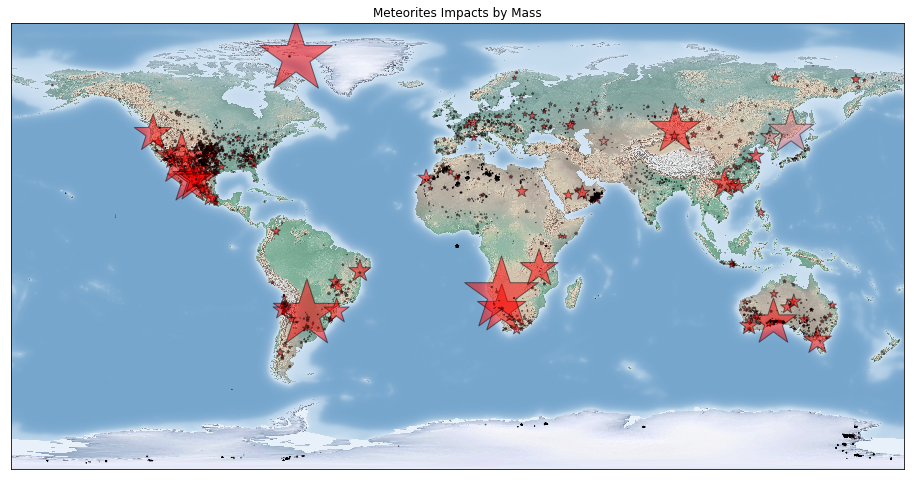

In [17]:
def get_discovery_color(discovery):
    if discovery == 'Fell':
        return 'LightCoral'
    elif discovery == 'Found':
        return 'Red'
    else:
        return 'Gold'

lat = clean_meteor_df['lat'].values
lon = clean_meteor_df['long'].values
mass = clean_meteor_df['mass'].values

discovery_type_list = clean_meteor_df['discovery']
discovery_color_list = [get_discovery_color(discovery_type) for discovery_type in discovery_type_list]

fig = plt.figure(figsize=(16,11))
m = Basemap()
m.shadedrelief()

m.scatter(lon, lat, latlon=True,
          c=discovery_color_list, s=mass/10000,
          alpha=0.5, marker="*", edgecolors="black")

plt.title("Meteorites Impacts by Mass")
plt.savefig("../meteorites_impact_by_mass.png")

Text(0.5,1,'Full Disk Orthographic Projection')

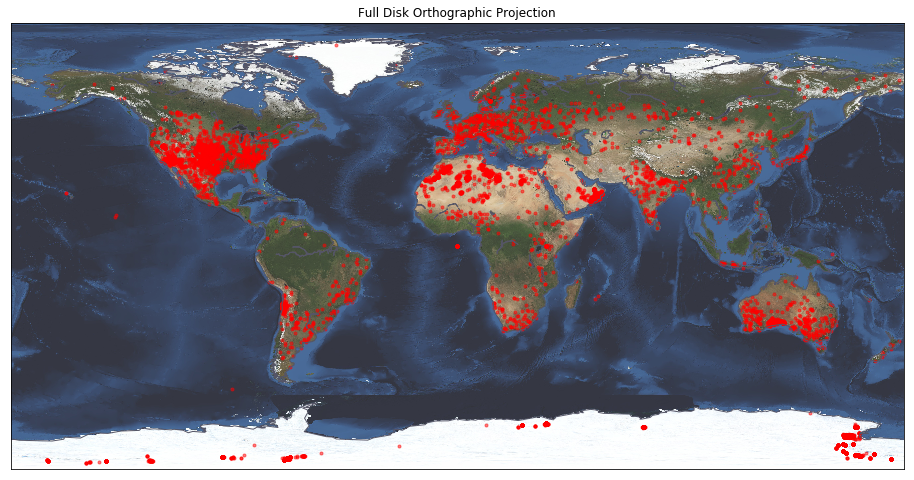

In [18]:
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(meteor['long'], meteor['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Orthographic Projection")

In [19]:
n_types = meteor['type'].unique().size
print(f'There are {n_types} unique meteor types.')

SyntaxError: invalid syntax (<ipython-input-19-c570d4965458>, line 2)

In [ ]:
# fig = plt.figure(figsize=(10,8))